***Import Libraries***


In [121]:
# Import NLTK (Natural Language Toolkit) libraries
from nltk.corpus import stopwords  # Stopwords: Common words that are often removed in text processing
from nltk import *  # NLTK library for natural language processing tasks

# Import scikit-learn libraries
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF Vectorizer: Converts text data to numerical vectors
from sklearn.model_selection import train_test_split  # Train-test split: Splits data into training and testing sets
import pandas as pd  # Pandas: Data manipulation and analysis library

# Import NLTK's WordNet Lemmatizer
from nltk.stem import WordNetLemmatizer  # WordNet Lemmatizer: Reduces words to their base or root form

# Import matplotlib for plotting
import matplotlib.pyplot as plt  # Matplotlib: Data visualization library

# Import Libraries for Text Processing and Machine Learning
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score


***Load the dataset***

In [73]:
file_content = pd.read_csv('C:/Users/hp/Downloads/archive/spam.csv', encoding = "ISO-8859-1")

In [74]:
file_content.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [75]:
file_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [76]:
file_content.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Text(0.5, 1.0, 'Distribution of Target in the dataset')

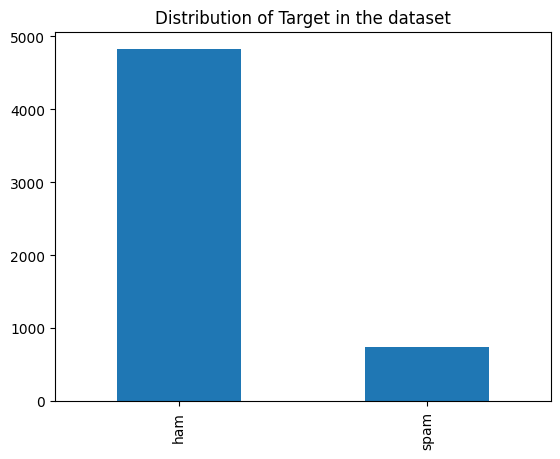

In [77]:
file_content['v1'].value_counts().plot(kind='bar')
plt.title("Distribution of Target in the dataset")

***Data Preprocessing***

Remove StopWords 

In [78]:
stop = stopwords.words('english')
file_content['v2'] = file_content['v2'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

Delete unwanted columns

In [79]:
Email_Data = file_content[['v1', 'v2']]

Rename column names

In [80]:
Email_Data = Email_Data.rename(columns={"v1":"Target", "v2":"Email"})
Email_Data.head()

,Target,Email
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think goes usf, lives around though"


Removes punctuation, converts text to lowercase, and removes double spaces.

In [81]:
Email_Data['Email'] = Email_Data['Email'].apply(lambda x:re.sub('[!@#$:).;,?&]','', x.lower()))
Email_Data['Email'] = Email_Data['Email'].apply(lambda x:re.sub(' ', ' ', x))
Email_Data['Email'].head(5)

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4             nah i think goes usf lives around though
Name: Email, dtype: object

Split the data into training and testing sets.

In [82]:
train, test = train_test_split(Email_Data, test_size=0.2)

# Tokenize the dataset

1. Import the Tokenizer class from the Keras library, which is commonly used for text preprocessing.
2. Create a Tokenizer object.
3. Use the fit_on_texts method to update the internal vocabulary of the tokenizer based on the 'Email' column of the training dataset (train['Email']). This step builds the vocabulary based on the words present in the training data.


In [83]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['Email'])

Calculate the maximum number of words to consider (MAX_NB_WORDS) based on the size of the vocabulary obtained from the training data.

In [84]:
# Calculate MAX_NB_WORDS based on vocabulary size
MAX_NB_WORDS = len(tokenizer.word_index)

Calculate the maximum sequence length (MAX_SEQUENCE_LENGTH) based on the maximum number of words in any individual email. The texts_to_sequences method converts each email text into a list of integers based on the tokenized vocabulary, and the length of the longest sequence is determined.

In [85]:
# Calculate MAX_SEQUENCE_LENGTH based on the maximum length of sequences: It represents the maximum number of words in any individual email
MAX_SEQUENCE_LENGTH = max(len(seq) for seq in tokenizer.texts_to_sequences(train['Email']))


In [86]:
# Represents the dimensionality of the word embeddings
EMBEDDING_DIM = 50

Re-initialize the tokenizer with the num_words parameter set to MAX_NB_WORDS. This step is intended to ensure that the tokenizer now considers only the top MAX_NB_WORDS words based on their frequency in the training data.

In [87]:
# Re-tokenize with the specified MAX_NB_WORDS
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train['Email'])


Converting both training and test data into sequences of integers

In [88]:
#Each word in the emails is replaced with its corresponding integer index based on a predefined vocabulary.
train_sequences = tokenizer.texts_to_sequences(train.Email)
test_sequences = tokenizer.texts_to_sequences(test.Email)


In [122]:
train_sequences

[[382, 3813, 2, 158, 5, 11, 1925, 320, 9, 2],
 [59,
  801,
  104,
  3814,
  735,
  104,
  168,
  131,
  3815,
  5,
  509,
  65,
  17,
  1596,
  28,
  1040],
 [149, 441, 3816, 38, 15, 3817, 147],
 [1, 15, 540, 192, 870, 3818, 15, 16, 321, 337, 4, 21, 73],
 [65, 47, 220, 1347, 871],
 [1926,
  105,
  8,
  1927,
  322,
  305,
  1928,
  108,
  105,
  1929,
  1930,
  802,
  292,
  686,
  83,
  84,
  1162,
  159,
  305,
  86,
  1931,
  1597,
  1932,
  942,
  872,
  942],
 [1, 422, 480, 736, 2, 1, 803, 873, 108, 2539, 2, 150, 338, 36, 20],
 [31, 60, 874, 55, 339],
 [23, 3819, 1348, 34, 3820, 34, 401, 2540],
 [52, 179, 238, 3, 648],
 [1, 1349, 50, 276, 3821, 192, 541, 4],
 [45, 57, 3822, 1163],
 [351,
  6,
  1933,
  943,
  26,
  306,
  875,
  1598,
  138,
  876,
  7,
  54,
  402,
  1164,
  1934,
  875,
  352,
  32,
  877,
  2541,
  14,
  944,
  1935,
  2542,
  340,
  84],
 [77, 31, 60, 42, 510, 160, 542, 3823],
 [277, 172, 3, 12, 65, 3, 20],
 [35, 1041, 42, 1165],
 [112, 10, 132, 66, 543, 27, 3

In [89]:
# Retrieve the dictionary containing words and their corresponding integer indices
word_index = tokenizer.word_index
# Print the total number of unique tokens
print('Found %s unique tokens.' % len(word_index))

Found 8417 unique tokens.


# Padding 


Padding ensures that all sequences have the same length for model compatibility.

In [90]:
# Import pad_sequences from Keras for sequence padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to a fixed length determined by MAX_SEQUENCE_LENGTH
# Padding ensures that all sequences have the same length for modeling
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Print the shapes of the padded sequences for training and testing data
print("Shape of padded training data:", train_data.shape)
print("Shape of padded testing data:", test_data.shape)


Shape of padded training data: (4457, 87)
Shape of padded testing data: (1115, 87)


# One-hot encoding

In [91]:
train_labels = train['Target']
test_labels = test['Target']

In [92]:
# Assuming train_labels and test_labels are your original string labels ('ham' and 'spam')
label_mapping = {'ham': 0, 'spam': 1}

# Convert string labels to numerical values
train_labels_numeric = [label_mapping[label] for label in train_labels]
test_labels_numeric = [label_mapping[label] for label in test_labels]

# Now apply one-hot encoding
labels_train_one_hot = to_categorical(train_labels_numeric)
labels_test_one_hot = to_categorical(test_labels_numeric)
print('Shape of data tensor:', train_data.shape)
print('Shape of one-hot encoded training labels:', labels_train_one_hot.shape)
print('Shape of one-hot encoded testing labels:', labels_test_one_hot.shape)


Shape of data tensor: (4457, 87)
Shape of one-hot encoded training labels: (4457, 2)
Shape of one-hot encoded testing labels: (1115, 2)


# Over-sampling

SMOTE (Synthetic Minority Over-sampling Technique) is a technique designed to address the class imbalance problem in machine learning datasets, particularly when dealing with imbalanced classes. It works by generating synthetic examples for the minority class to balance the class distribution.

**Explanation** : In the SMOTE technique, the process involves finding the k nearest neighbors for a selected minority class instance, where the user defines the value of k. Synthetic instances are then generated by interpolating between the chosen instance and its neighbors. This interpolation is carried out by randomly selecting values between 0 and 1 for each feature, creating new instances along the line connecting the chosen instance and its neighbor. The entire process is repeated for a specified number of instances or until a balanced distribution between the minority and majority classes is achieved in the dataset. The goal is to augment the minority class and address class imbalance in machine learning datasets.

In [93]:
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE class
smote = SMOTE(sampling_strategy='auto',random_state=42)
# Apply SMOTE to the training data and labels
train_data_smote, labels_train_smote = smote.fit_resample(train_data, labels_train_one_hot)
# Convert the balanced numeric labels to one-hot encoded format
labels_train_smote = to_categorical(labels_train_smote, num_classes=2)

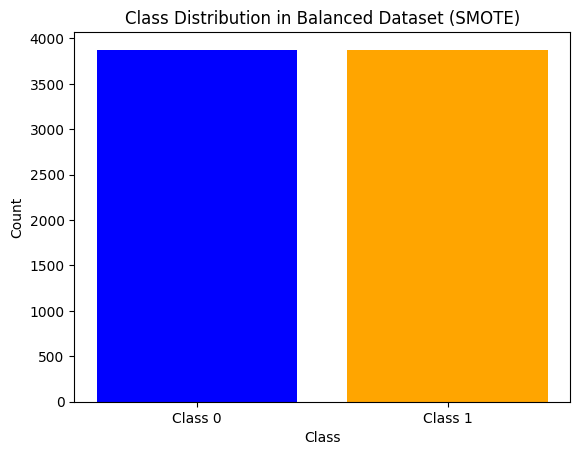

In [94]:
import matplotlib.pyplot as plt

# Calculate the count of each class in the balanced dataset
class_counts = labels_train_smote.sum(axis=0)

# Get class labels for the x-axis
class_labels = ['Class 0', 'Class 1']

# Plot the bar chart
plt.bar(class_labels, class_counts, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Balanced Dataset (SMOTE)')
plt.show()


# Model Architecture

**1. CNN**

We defined a 1D Convolutional Neural Network (CNN) model for text classification. 
It utilizes an Embedding layer to map words to dense vectors, followed by Conv1D layers with MaxPooling, 
Dropout for regularization, and Batch Normalization for normalization. The model is designed to learn 
hierarchical features from the input text data. The final Dense layers serve as the classifier, and the 
softmax activation function is used for binary classification. The training is performed on the balanced 
dataset obtained after applying Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance.Adjust hyperparameters such as batch size, epochs, and layer configurations as needed for your specific task.

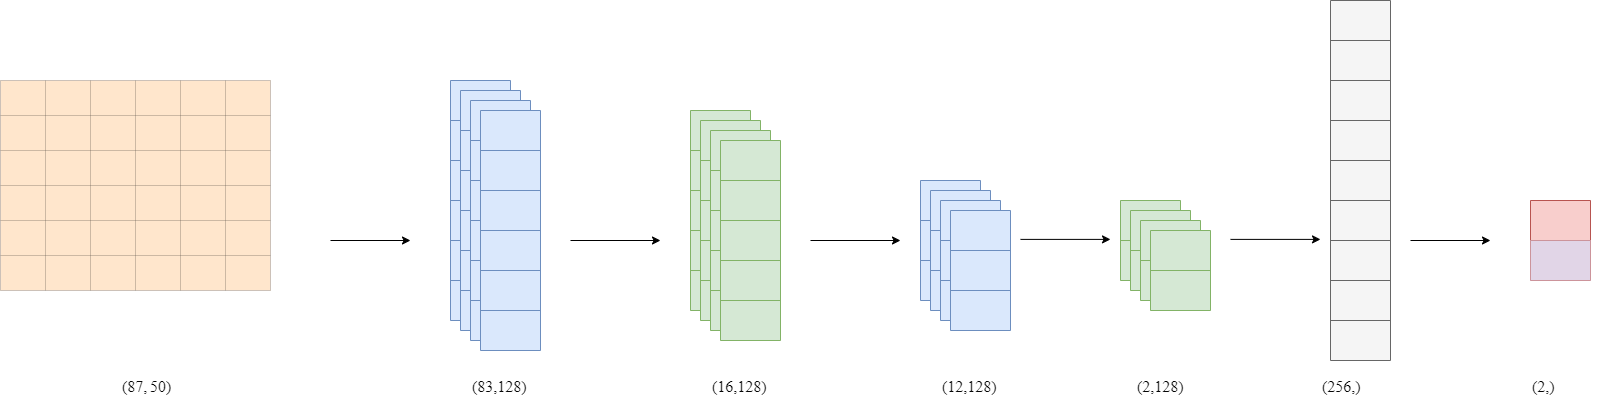

In [97]:
print('Training CNN 1D model.')
model = Sequential()
# Add an Embedding layer to map the words to dense vectors of fixed size
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
# Apply dropout to prevent overfitting
model.add(Dropout(0.3))
# Add the first Conv1D layer with 128 filters, kernel size 5, and ReLU activation

model.add(Conv1D(128, 5, activation='relu'))
# Apply MaxPooling to reduce the spatial dimensions
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
# Apply Batch Normalization for normalization
model.add(BatchNormalization())

model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Flatten the output to connect to Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Add the output layer with 2 units (for binary classification) and softmax activation
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(train_data_smote, labels_train_smote,batch_size=64,epochs=5,validation_data=(test_data, labels_test_one_hot))

Training CNN 1D model.
Epoch 1/5
122/122 [==============================] - 6s 34ms/step - loss: 0.4510 - acc: 0.8206 - val_loss: 0.3668 - val_acc: 0.8511
Epoch 2/5
122/122 [==============================] - 4s 29ms/step - loss: 0.3267 - acc: 0.8833 - val_loss: 0.3351 - val_acc: 0.8520
Epoch 3/5
122/122 [==============================] - 4s 29ms/step - loss: 0.2551 - acc: 0.9088 - val_loss: 0.2650 - val_acc: 0.9184
Epoch 4/5
122/122 [==============================] - 4s 32ms/step - loss: 0.2193 - acc: 0.9303 - val_loss: 0.2368 - val_acc: 0.9274
Epoch 5/5
122/122 [==============================] - 5s 38ms/step - loss: 0.1935 - acc: 0.9401 - val_loss: 0.2639 - val_acc: 0.9193


In [98]:
# predict the class probabilities for the test data
predicted=model.predict(test_data)
predicted

35/35 [==============================] - 0s 8ms/step


array([[0.9064538 , 0.09354618],
       [0.9064538 , 0.09354618],
       [0.9064538 , 0.09354618],
       ...,
       [0.9064538 , 0.09354618],
       [0.9064538 , 0.09354618],
       [0.8901505 , 0.10984953]], dtype=float32)

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 87, 50)            420850    
                                                                 
 dropout_9 (Dropout)         (None, 87, 50)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 83, 128)           32128     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 16, 128)          0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 128)           0         
                                                                 
 batch_normalization_6 (Batc  (None, 16, 128)          512       
 hNormalization)                                      

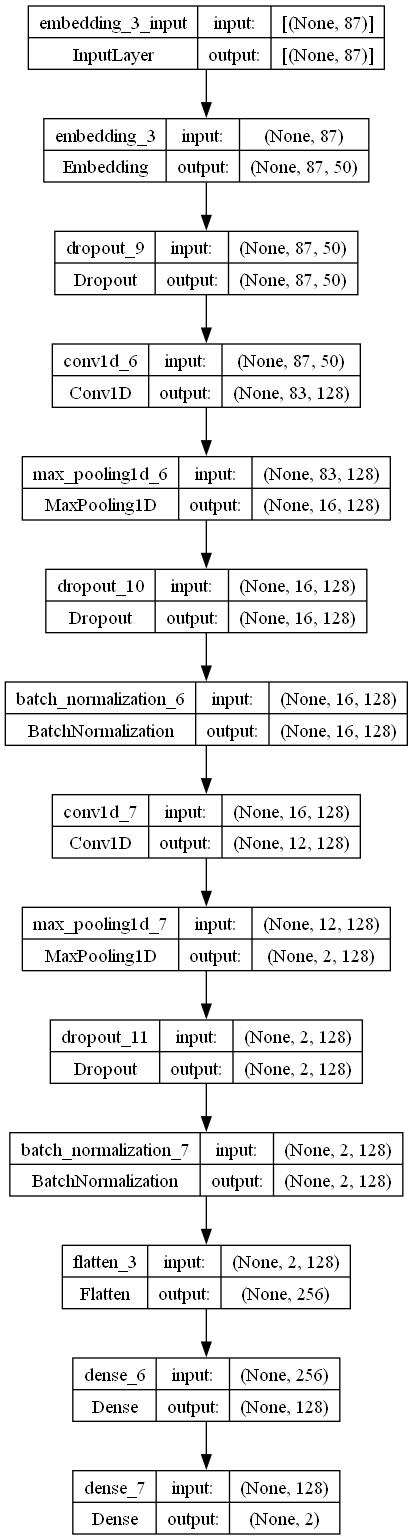

In [102]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [104]:
precision, recall, fscore, support = score(labels_test_one_hot,
predicted.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("##############classification_report##############")
print(sklearn.metrics.classification_report(labels_test_one_hot,predicted.round()))

precision: [0.94051282 0.77142857]
recall: [0.9662803  0.65060241]
fscore: [0.95322245 0.70588235]
support: [949 166]
##############classification_report##############
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       949
           1       0.77      0.65      0.71       166

   micro avg       0.92      0.92      0.92      1115
   macro avg       0.86      0.81      0.83      1115
weighted avg       0.92      0.92      0.92      1115
 samples avg       0.92      0.92      0.92      1115



***2. RNN***

The following code defines a SimpleRNN model for text classification. The model incorporates an Embedding layer to convert words into vectors, followed by a SimpleRNN layer with 2 neurons. The input_shape=(None, 1) indicates that the layer expects sequences of 1-dimensional vectors of any length. The final Dense layer acts as a classifier with softmax activation for binary classification. The model is compiled with binary crossentropy loss and Adam optimizer.The training is performed on the balanced dataset obtained after applying Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance.

In [109]:
from keras.layers import SimpleRNN

print('Training SIMPLERNN model.')
modelrr = Sequential()
# Add an embedding layer to convert words to vectors
modelrr.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
# Add a SimpleRNN layer with 2 units (neurons)
# input_shape=(None, 1) indicates that the layer expects sequences of 1-dimensional vectors of any length
modelrr.add(SimpleRNN(2, input_shape=(None,1)))
# Add a dense layer with 2 neurons and softmax activation for binary classification
modelrr.add(Dense(2,activation='softmax'))
# Compile the model with binary crossentropy loss and Adam optimizer
modelrr.compile(loss = 'binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
modelrr.fit(train_data_smote, labels_train_smote,batch_size=16,epochs=5,validation_data=(test_data, labels_test_one_hot))


Training SIMPLERNN model.
Epoch 1/5
485/485 [==============================] - 10s 18ms/step - loss: 0.4362 - accuracy: 0.8897 - val_loss: 0.2973 - val_accuracy: 0.9453
Epoch 2/5
485/485 [==============================] - 8s 17ms/step - loss: 0.2293 - accuracy: 0.9534 - val_loss: 0.2030 - val_accuracy: 0.9570
Epoch 3/5
485/485 [==============================] - 10s 20ms/step - loss: 0.1434 - accuracy: 0.9725 - val_loss: 0.1783 - val_accuracy: 0.9498
Epoch 4/5
485/485 [==============================] - 12s 26ms/step - loss: 0.0953 - accuracy: 0.9837 - val_loss: 0.1852 - val_accuracy: 0.9390
Epoch 5/5
485/485 [==============================] - 13s 26ms/step - loss: 0.0662 - accuracy: 0.9907 - val_loss: 0.1604 - val_accuracy: 0.9498


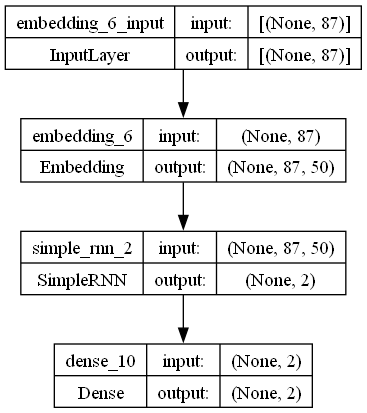

In [114]:
plot_model(modelrr, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [115]:
predicted_Srnn=modelrr.predict(test_data)
predicted_Srnn

 1/35 [..............................] - ETA: 1s

35/35 [==============================] - 0s 6ms/step


array([[9.9453211e-01, 5.4678223e-03],
       [9.1783518e-01, 8.2164831e-02],
       [9.9951506e-01, 4.8489645e-04],
       ...,
       [9.9954909e-01, 4.5087203e-04],
       [9.9947995e-01, 5.2005728e-04],
       [9.9892634e-01, 1.0736607e-03]], dtype=float32)

In [116]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test_one_hot,predicted_Srnn.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("#############classification_report###############")
print(sklearn.metrics.classification_report(labels_test_one_hot,predicted_Srnn.round()))

precision: [0.98691385 0.77777778]
recall: [0.95363541 0.92771084]
fscore: [0.96998928 0.84615385]
support: [949 166]
#############classification_report###############
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       949
           1       0.78      0.93      0.85       166

   micro avg       0.95      0.95      0.95      1115
   macro avg       0.88      0.94      0.91      1115
weighted avg       0.96      0.95      0.95      1115
 samples avg       0.95      0.95      0.95      1115



***3. LSTM***

LSTM (Long Short-Term Memory) model for text classification. The model begins withan Embedding layer to convert words into vectors, followed by an LSTM layer with 16 units, ReLU activation, and return_sequences=True, indicating that it outputs the full sequence. Two Dropout layers with a rate of 0.2 each are added for regularization to mitigate overfitting. A Batch Normalization layer is included to normalize the activations of the neurons. The output is flattened to convert it to a flat vector, and a Dense layer with softmax activation serves as the classifier for binary classification. The model is compiled with binary crossentropy loss, Adam optimizer, and accuracy metric. Training is performed on the balanced dataset obtained after applying Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance.

In [117]:
print('Training LSTM model.')
modellstm = Sequential()
modellstm.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
# Add an LSTM layer with 16 units, ReLU activation, and return sequences (output the full sequence)
modellstm.add(LSTM(units=16, activation='relu', return_sequences=True))
 #Add a Dropout layer with a dropout rate of 0.2
# Using two Dropout layers provides additional regularization, reducing the risk of overfitting
modellstm.add(Dropout(0.2))
modellstm.add(Dropout(0.2))
# Add Batch Normalization layer to normalize the activations of the neurons
modellstm.add(BatchNormalization())
# Flatten layer to convert the output to a flat vector
modellstm.add(Flatten())
modellstm.add(Dense(2,activation='softmax'))
# Compile the model with binary crossentropy loss, Adam optimizer, and accuracy metric
modellstm.compile(loss = 'binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
modellstm.fit(train_data_smote, labels_train_smote,batch_size=16,epochs=5,validation_data=(test_data, labels_test_one_hot))

Training LSTM model.
Epoch 1/5
485/485 [==============================] - 15s 28ms/step - loss: 0.2696 - accuracy: 0.8989 - val_loss: 0.1582 - val_accuracy: 0.9668
Epoch 2/5
485/485 [==============================] - 13s 26ms/step - loss: 0.1028 - accuracy: 0.9640 - val_loss: 0.1387 - val_accuracy: 0.9605
Epoch 3/5
485/485 [==============================] - 14s 28ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.1763 - val_accuracy: 0.9570
Epoch 4/5
485/485 [==============================] - 15s 30ms/step - loss: 0.0231 - accuracy: 0.9939 - val_loss: 0.1606 - val_accuracy: 0.9587
Epoch 5/5
485/485 [==============================] - 13s 28ms/step - loss: 0.0149 - accuracy: 0.9961 - val_loss: 0.1703 - val_accuracy: 0.9605


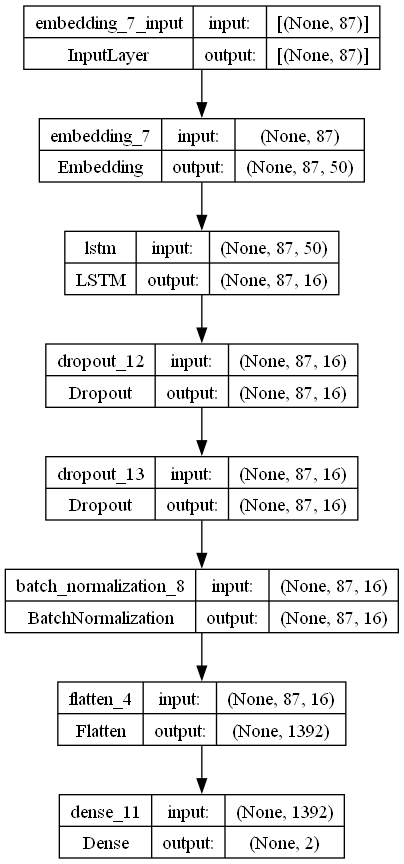

In [118]:
plot_model(modellstm, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [119]:
predicted_lstm=modellstm.predict(test_data)
predicted_lstm

35/35 [==============================] - 0s 7ms/step


array([[9.9999928e-01, 7.0113100e-07],
       [9.9999940e-01, 5.6241805e-07],
       [1.0000000e+00, 4.6521720e-08],
       ...,
       [9.9998760e-01, 1.2383263e-05],
       [1.0000000e+00, 5.8378514e-14],
       [1.0000000e+00, 7.1896903e-16]], dtype=float32)

In [120]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test_one_hot,predicted_lstm.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("#############classification_report###############")
print(sklearn.metrics.classification_report(labels_test_one_hot,predicted_lstm.round()))

precision: [0.97782471 0.86309524]
recall: [0.97576396 0.87349398]
fscore: [0.97679325 0.86826347]
support: [949 166]
#############classification_report###############
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       949
           1       0.86      0.87      0.87       166

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.92      0.92      0.92      1115
weighted avg       0.96      0.96      0.96      1115
 samples avg       0.96      0.96      0.96      1115

